# SID - THE AI ASSISTANT 
The Virtual Assistant powered by **IBM Watson** with features:-
* Greetings
* What's New
* Remembering Persons Name.
* Time
* Google Search
* Youtube Search
* Jokes
* Current Weather
* Maps
* News

In [19]:
#The Animation to be Included.... (Created and Rendered Using Blender)
from IPython.display import Video
display(Video("/Users/siddharthmandgi/Desktop/AskSID/Gifs_and_Video/logo.mp4", embed = True, width=500, height=500))

In [18]:
import speech_recognition as sr # recognise speech
import playsound # to play an audio file
import random # random selection
from time import ctime # get time details
import webbrowser # open browser
import yfinance as yf # to fetch financial data
import ssl #auth web browser
import certifi #auth web browser
import time #get time
import os # to remove created audio files
import pandas as pd #dataframe

In [3]:
#SELENIUM set up to get web screenshots
from selenium import webdriver
from time import sleep
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options

In [4]:
def capture(txt):
    options = webdriver.ChromeOptions()
    options.add_argument('--headless')
    options.add_argument('--start-maximized')
    driver = webdriver.Chrome(ChromeDriverManager().install(),chrome_options=options)
    driver.get(txt)
    driver.get_screenshot_as_file("capture.png")
    driver.quit()
    from IPython.display import display, Image
    display(Image(filename='capture.png'))
    os.remove('capture.png')

In [5]:
r = sr.Recognizer()

## TEXT TO SPEECH MODEL

### IBM Watson

In [6]:
#IBM WASTON TEXT TO SPEECH (Version - SID)
from ibm_watson import TextToSpeechV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
api = IAMAuthenticator('roo6Pt-IwXpm8_05fOpog9yl4VdnfKC0L3_1F1q3MDIE')
text_2_speech = TextToSpeechV1(authenticator = api)
text_2_speech.set_service_url('https://api.us-south.text-to-speech.watson.cloud.ibm.com/instances/8f2a8a94-bde4-4575-b397-781814f3ae93')

def speak(txt):
    with open ("welcome.mp3","wb") as audiofile:
        audiofile.write(
        text_2_speech.synthesize(txt, accept = "audio/mp3").get_result().content
        )

    playsound.playsound('welcome.mp3', True)
    os.remove('welcome.mp3')
    
    print('SID:',txt)

In [7]:
def record_audio(ask=False):
    with sr.Microphone() as source: # microphone as source
        if ask:
            speak(ask)
        audio = r.listen(source)  # listen for the audio via source
        voice_data = ''
        try:
            voice_data = r.recognize_google(audio)  # convert audio to text
        except sr.UnknownValueError: # error: recognizer does not understand
            speak('I did not get that')
        except sr.RequestError:
            speak('Sorry, the service is down') # error: recognizer is not connected
        print(f">> {voice_data.lower()}") # print what user said
        return voice_data.lower()

In [8]:
class person:
    name = ''
    
    def setName(self, name):
        self.name = name
    
    def presence(self):
        if self.name == '':
            return(0)
        else:
            return(self.name)

def there_exists(terms):
    for term in terms:
        if term in voice_data:
            return True

In [9]:
person_obj = person()

In [15]:
def respond(voice_data): 
    
    # 1: greeting
    if there_exists(['hey','hi','hello','greetings','howdy']):
        greetings = [f"Hello Sir., How can I help you today.", f"Hello Sir"]
        greet = greetings[random.randint(0,len(greetings)-1)]
        speak(greet)
        
    # 2: greetings (how are you)
    if there_exists(["how are you","how are you doing","how have you been"]):
        speak(f"I'm very well Sir, thank you for asking.")
        
    #3: greetings (whats'up)
    if there_exists(["what is up", "what's up", "what is cracking", "what's cracking", "what is good", "what's good", 
                    "what is happening", "what's happening", 
                     "what is new", "what's new", "what is neww"]):  
        speak('A lot actually Sir! I am currently becoming more self aware and you are doing a fantastic job helping me!')     

    # 2: name
    if there_exists(["what is your name","what's your name","tell me your name"]):
        speak("My Name is Sid. Nice to Meet You!")

    if there_exists(["my name is"]):
        person_name = voice_data.split("is")[-1].strip()
        print(person_name)
        speak(f"okay Sir, i will remember that.")
        person_obj.setName(person_name) # remember name in person object
        
        
    if there_exists(["what is my name", "what's my name","Can You Tell Me My name","Can you tell my name"]):
            if person_obj.presence()!=0:
                speak('You are called '+str(person_obj.presence()[0].upper()+person_obj.presence()[1:]+'.'))
            else:
                speak("Sorry Sir, Unfortunately, I may have forgotten your name, Could You repeat it for me?")
            
            
    # 4: time
    if there_exists(["what's the time","tell me the time","what time is it"]):
        time = ctime().split(" ")[3].split(":")[0:2]
        if time[0] == "00":
            hours = '12'
        else:
            hours = time[0]
        minutes = time[1]
        time = f'{hours} Hours & {minutes} Minutes.'
        speak(time)

    # 5: search google
    if there_exists(["search for","look up","find"]) and 'youtube' not in voice_data and 'maps' not in voice_data:
        search_term = voice_data
        if "search for" in search_term:
            search_term = search_term.replace("search for","")
        if "find" in search_term:
             search_term = search_term.replace("find","")
        if "look for" in search_term:
             search_term = search_term.replace("look for","")
        if "in google" in search_term:
             search_term = search_term.replace("in google","")
        if "on google" in search_term:
             search_term = search_term.replace("on google","")
                
       
        url = f"https://google.com/search?q={search_term}"
        webbrowser.get().open(url)
        speak(f'Sir, Here is what I found for{search_term}on Google.')

    # 6: search youtube
    if there_exists(["youtube"]):
        search_term = voice_data.split("for")[-1]
        search_term = search_term.replace('youtube','YouTube')
        url = f"https://www.youtube.com/results?search_query={search_term}"
        webbrowser.get().open(url)
        speak(f'Sir, Here is what I found on YouTube.')
        
     #7: Joke
    '''DatatSet -> https://www.kaggle.com/abhinavmoudgil95/short-jokes'''
    if there_exists(["tell me a joke","could you tell me a joke","can you tell me a joke"]):
        reply = [f"Sure Sir.",f"Alright Sir.", f"Of Course Sir."]
        k = reply[random.randint(0,len(reply)-1)]
        speak(k)
        j = pd.read_csv('shortjokes.csv').tail(2000)
        j = j.reset_index()
        j = j['Joke']
        a = (j.sample(n=1))
        i = list(a.index)[0]
        j = a[i]
        speak(str(j))
        
     #8: Weather
    if there_exists(["weather"]):
        reply1 = [f"Sir, Here is the current weather.",f"Sir, Here is today's weather."]
        w = reply1[random.randint(0,len(reply1)-1)]
        speak(w)
        capture('https://weather.com/weather/today/l/c374af2c1202cecf6ed9e799e7be1e2eb25dbf1dd7b61717e9795ae88b4c5b43')
        
    #9: Maps
    if there_exists(["search for","find"]) and there_exists(["maps"]):
        search_term = voice_data
        if "search for" in search_term:
            search_term = search_term.replace("search for","")
        if "find" in search_term:
             search_term = search_term.replace("find","")
        if "look for" in search_term:
             search_term = search_term.replace("look for","")
        if "in google maps" in search_term:
             search_term = search_term.replace("in google maps","")
        if "on google maps " in search_term:
             search_term = search_term.replace("on google maps","")
        
        url = f"https://www.google.com/maps/place/{search_term}"
        webbrowser.get().open(url)
        speak(f'Sir, Here is what I found on Google Maps.')
        
    
    if there_exists(["news headlines"]) or there_exists(["current news"]) :
        search_term = voice_data
        speak("Here some current news headlines. This might take a few minutes.")
        capture('https://news.google.com/topics/CAAqJggKIiBDQkFTRWdvSUwyMHZNRFZxYUdjU0FtVnVHZ0pWVXlnQVAB?hl=en-US&gl=US&ceid=US%3Aen')
        print('To read all click on:','https://news.google.com/topics/CAAqJggKIiBDQkFTRWdvSUwyMHZNRFZxYUdjU0FtVnVHZ0pWVXlnQVAB?hl=en-US&gl=US&ceid=US%3Aen')
        

## Specific Dialogues

SID - THE AI ASSISTANT
>> what is the current weather


[WDM] - Current google-chrome version is 86.0.4240
[WDM] - Get LATEST driver version for 86.0.4240


SID: Sir, Here is today's weather.
 


[WDM] - Driver [/Users/siddharthmandgi/.wdm/drivers/chromedriver/mac64/86.0.4240.22/chromedriver] found in cache


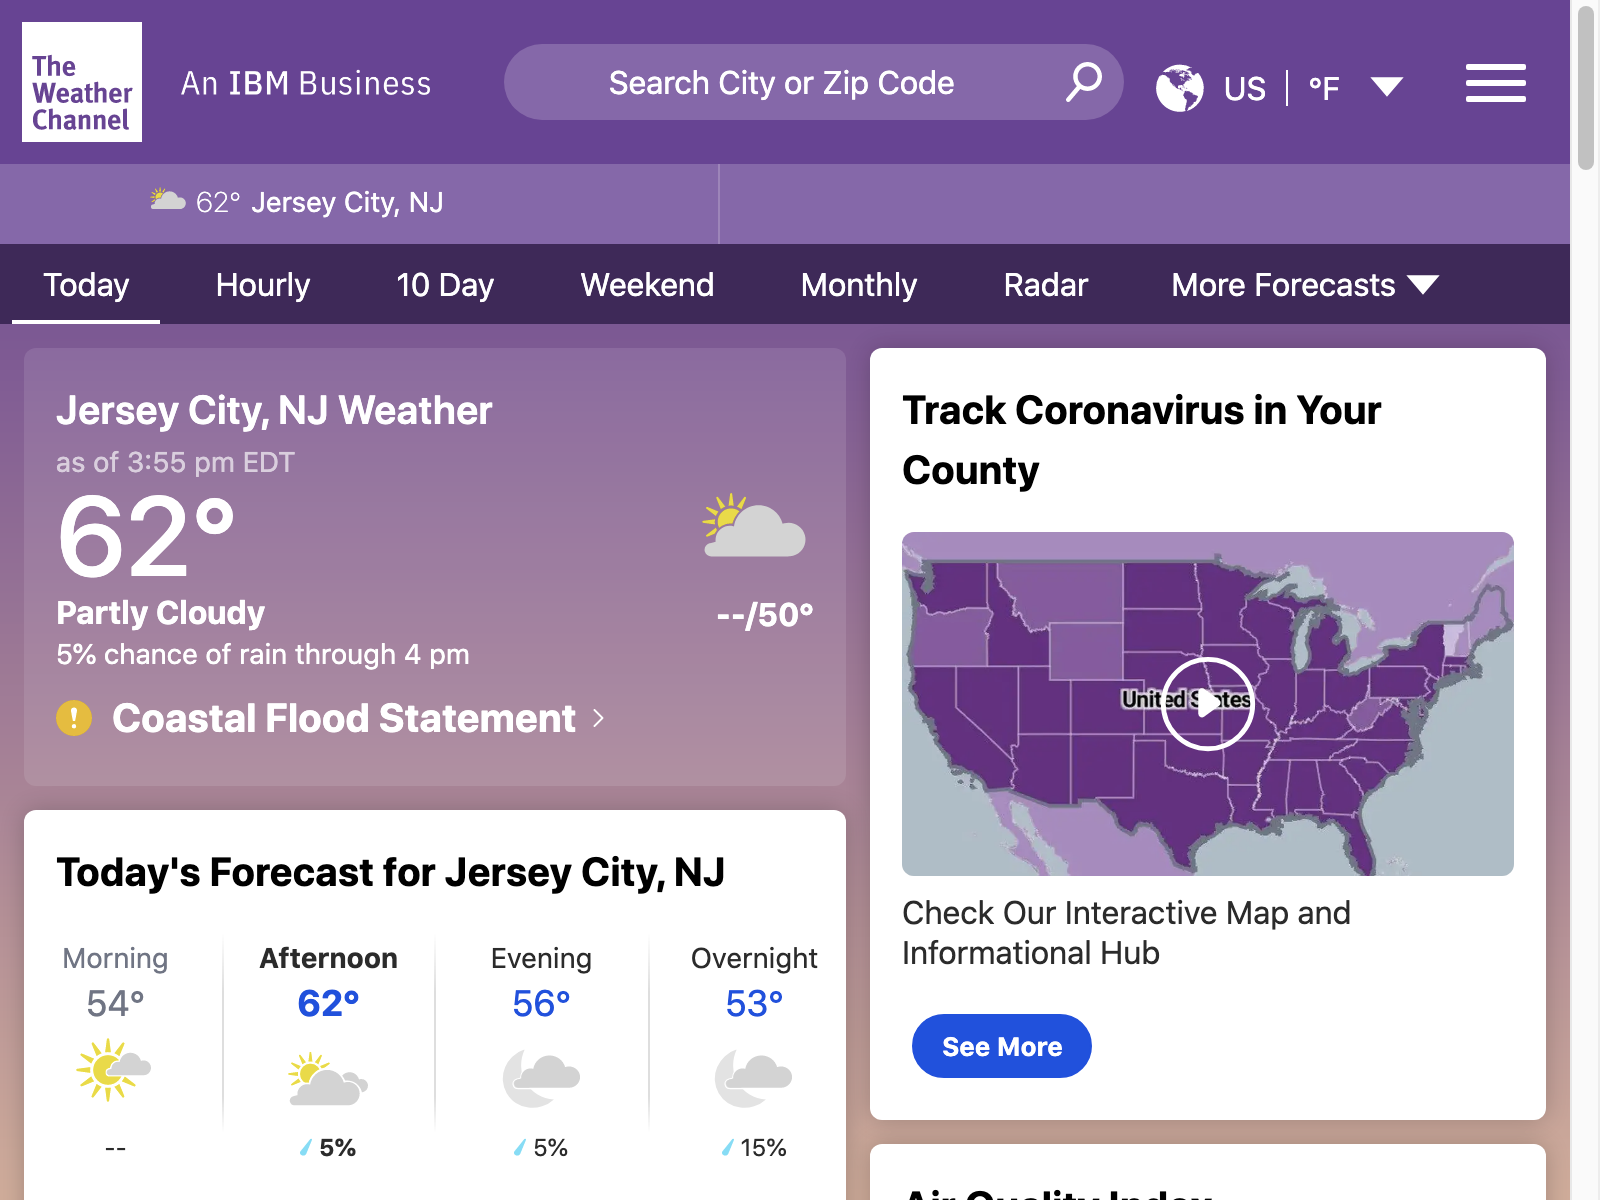

In [17]:
print("SID - THE AI ASSISTANT")
voice_data = record_audio()
respond(voice_data)

## Have a full conversation with SID

In [16]:
print("Talk to Sid")
#let exit code = 445464

while voice_data != 446454:
    if 'bye' not in voice_data: 
        voice_data = record_audio()
        respond(voice_data)
    
    elif 'bye' in voice_data:
        speak('Goodbye Sir')
        voice_data = 446454  
        
voice_data = ''